<a href="https://colab.research.google.com/github/LeonardoCorreia08/Filter/blob/main/Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install noisereduce

In [2]:
import numpy as np
import noisereduce as nr
from scipy.io import wavfile
from pydub import AudioSegment
import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [3]:
# Converter áudio para mono
def stereo_to_mono(stereo_sound):
    mono_sound = np.mean(stereo_sound, axis=1)
    return mono_sound


# Função para alterar o tom do áudio
def change_pitch(audio_path, semitones):
    sound = AudioSegment.from_file(audio_path)
    new_sound = sound.set_frame_rate(int(sound.frame_rate * 2**(semitones/12.0)))
    return new_sound

In [4]:
# Carregar arquivos de áudio

# Carregar o áudio voz
sample_blender, sound_blender = wavfile.read("voz_1.wav")
voz_mono = stereo_to_mono(sound_blender)

# Carregar o áudio voz e ruido
sample_rate_voice_noise, sound_data_voice_noise = wavfile.read("voz_2.wav")
liquidificador_voz_mono = stereo_to_mono(sound_data_voice_noise)

# Carregar o áudio do ruido
sample_rate_blender, sound_data_blender = wavfile.read("voz_3.wav")
liquidificador_mono = stereo_to_mono(sound_data_blender)

#Carregar o resultado
sample_r, sound_r = wavfile.read("Vozf.wav")
resultado = sound_r


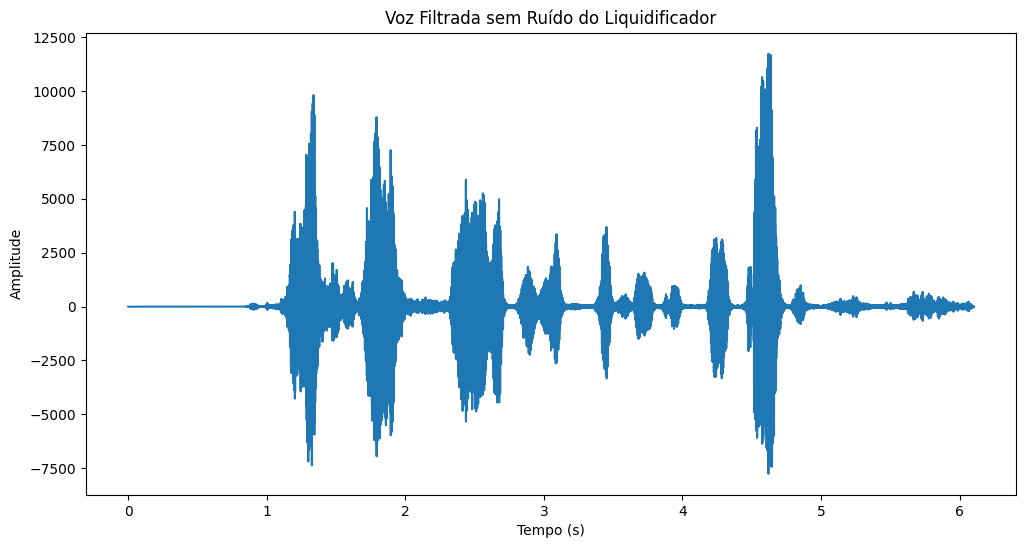

In [ ]:
# Aplicar a supressão de ruído utilizando a biblioteca noisereduce
reduced_noise = nr.reduce_noise(y=liquidificador_voz_mono, sr=sample_rate_voice_noise)

# Exibir e reproduzir o resultado
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(reduced_noise)) / sample_rate_voice_noise, reduced_noise)
plt.title("Voz Filtrada sem Ruído do Liquidificador")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

display(Audio(reduced_noise, rate=sample_rate_voice_noise, autoplay=True))


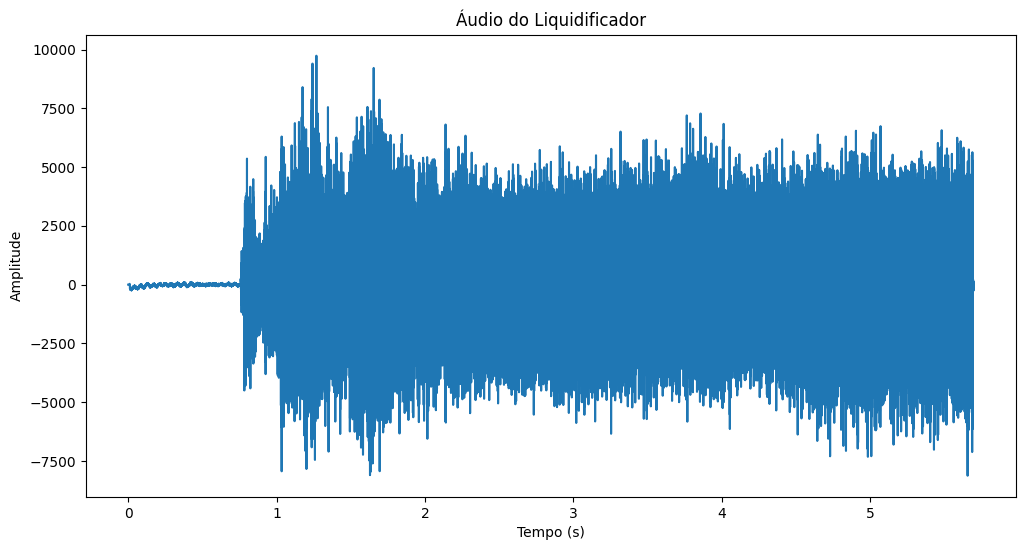

In [ ]:
# Calcular o eixo de tempo
tempo = np.arange(len(liquidificador_mono)) / sample_rate_blender

# Plot do áudio do liquidificador
plt.figure(figsize=(12, 6))
plt.plot(tempo, liquidificador_mono)
plt.title("Áudio do Liquidificador")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# Exibir e reproduzir o áudio do ruído do liquidificador
display(Audio(liquidificador_mono, rate=sample_rate_blender, autoplay=True))


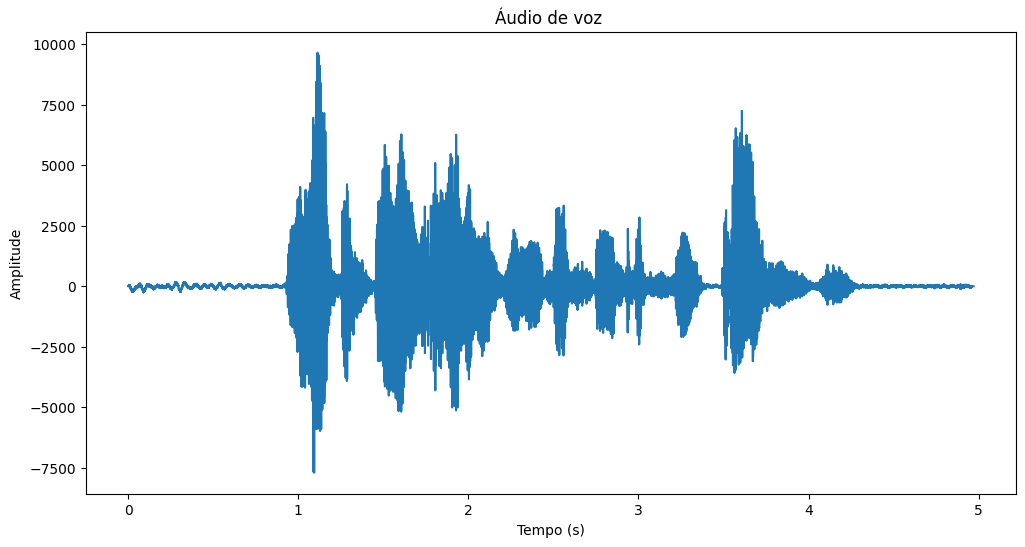

In [ ]:
# Calcular o eixo de tempo
tempo = np.arange(len(voz_mono)) / sample_blender

# Plot do áudio do liquidificador
plt.figure(figsize=(12, 6))
plt.plot(tempo, voz_mono)
plt.title("Áudio de voz ")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# Exibir e reproduzir o áudio do ruído do liquidificador
display(Audio(voz_mono, rate=sample_blender, autoplay=True))

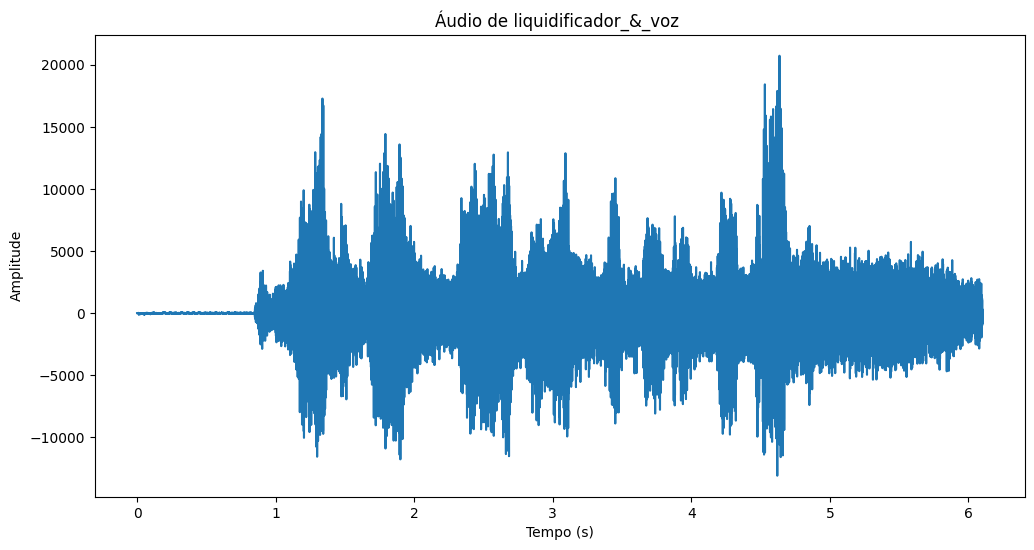

In [ ]:
#Calcular o eixo de tempo
tempo = np.arange(len(liquidificador_voz_mono)) / sample_rate_voice_noise

#Plot do áudio do liquidificador
plt.figure(figsize=(12, 6))
plt.plot(tempo, liquidificador_voz_mono)
plt.title("Áudio de liquidificador_&_voz ")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# Exibir e reproduzir o áudio do ruído do liquidificador
display(Audio(liquidificador_voz_mono, rate=sample_rate_voice_noise, autoplay=True))

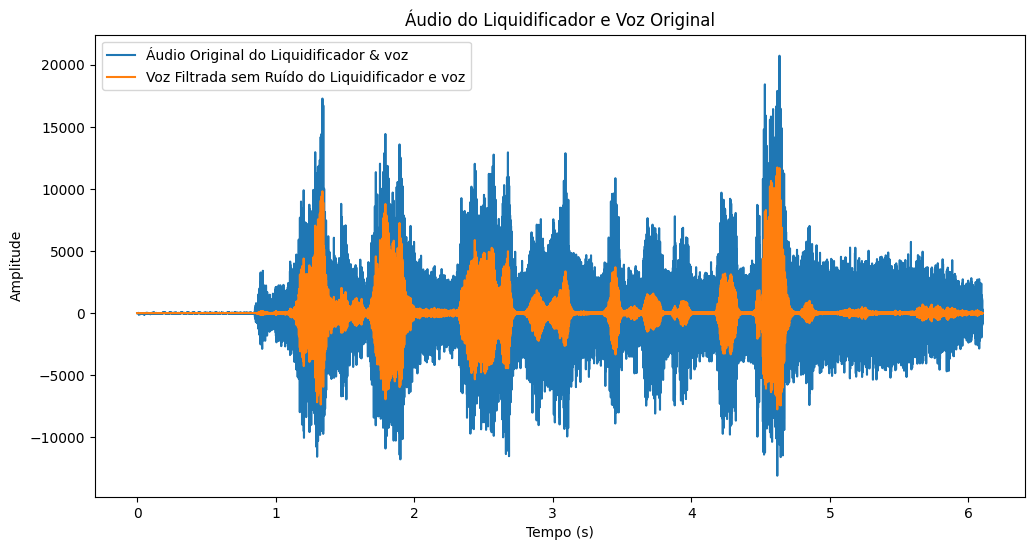

In [ ]:
# Calcular o eixo de tempo para o áudio original do liquidificador
tempo_blender = np.arange(len(liquidificador_voz_mono)) / sample_rate_blender

# Plot do áudio original do liquidificador
plt.figure(figsize=(12, 6))
plt.plot(tempo_blender, liquidificador_voz_mono, label='Áudio Original do Liquidificador & voz')
plt.title("Áudio do Liquidificador e Voz Original")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

# Aplicar a supressão de ruído utilizando a biblioteca noisereduce
reduced_noise = nr.reduce_noise(y=liquidificador_voz_mono, sr=sample_rate_voice_noise)

# Calcular o eixo de tempo para o áudio filtrado
tempo_filtered = np.arange(len(reduced_noise)) / sample_rate_voice_noise

# Plot do áudio filtrado da voz com o ruído do liquidificador removido
plt.plot(tempo_filtered, reduced_noise, label='Voz Filtrada sem Ruído do Liquidificador e voz')
plt.legend()
plt.show()

display(Audio(reduced_noise, rate=sample_rate_voice_noise, autoplay=True))


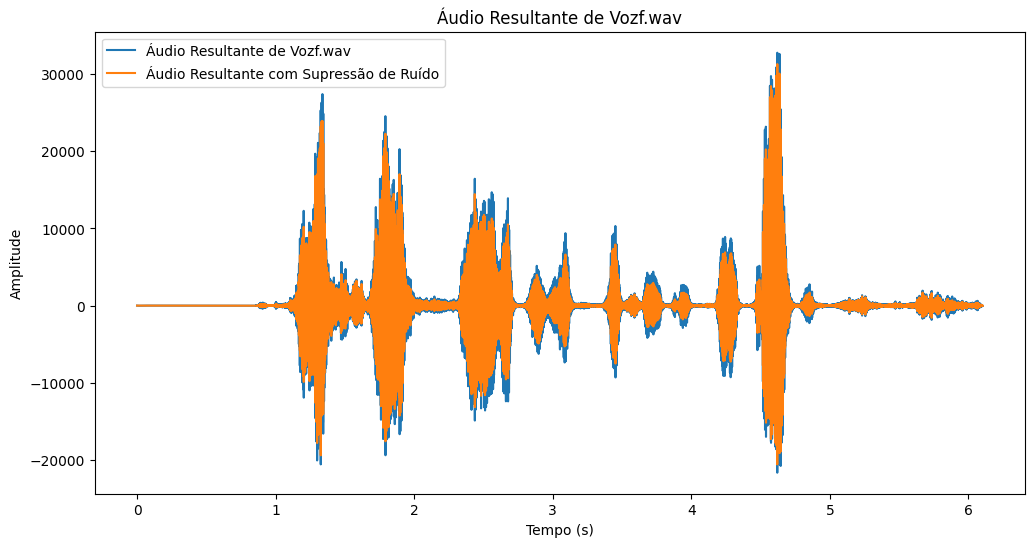

In [ ]:
# Calcular o eixo de tempo para o áudio resultante
tempo_resultado = np.arange(len(resultado)) / sample_r

# Plot do áudio resultante de "Vozf.wav"
plt.figure(figsize=(12, 6))
plt.plot(tempo_resultado, resultado, label='Áudio Resultante de Vozf.wav')
plt.title("Áudio Resultante de Vozf.wav")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")

# Ajustar o parâmetro prop_decrease
prop_decrease = 0.5  # Ajuste este valor conforme necessário

# Aplicar a supressão de ruído com o parâmetro prop_decrease
reduced_noise = nr.reduce_noise(y=resultado, sr=sample_r, prop_decrease=prop_decrease)

# Calcular o eixo de tempo para o áudio resultante após supressão de ruído
tempo_reduced = np.arange(len(reduced_noise)) / sample_r

# Plot do áudio resultante após supressão de ruído
plt.plot(tempo_reduced, reduced_noise, label='Áudio Resultante com Supressão de Ruído')
plt.legend()
plt.show()

# Exibir e reproduzir o resultado após supressão de ruído
display(Audio(reduced_noise, rate=sample_r, autoplay=True))


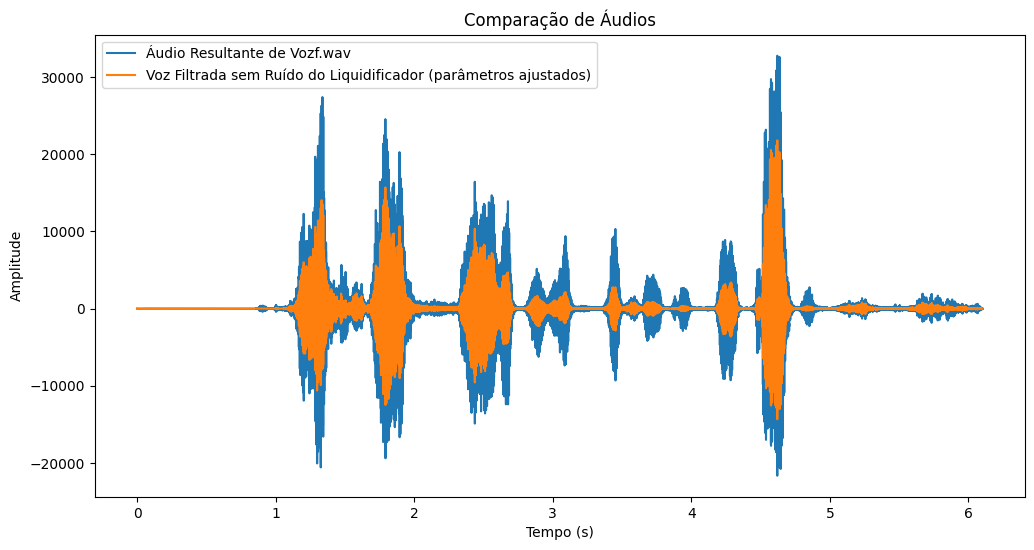

In [ ]:
# Definir os parâmetros
win_length = 1024
time_mask_smooth_ms = 150

# Aplicar a supressão de ruído com os parâmetros ajustados
reduced_noise = nr.reduce_noise(y=resultado, sr=sample_r, win_length=win_length, time_mask_smooth_ms=time_mask_smooth_ms)

# Calcular o eixo de tempo para o áudio resultante após supressão de ruído
tempo_reduced = np.arange(len(reduced_noise)) / sample_r

# Plot dos áudios sobrepostos
plt.figure(figsize=(12, 6))
plt.plot(tempo_reduced, resultado, label='Áudio Resultante de Vozf.wav')
plt.plot(tempo_reduced, reduced_noise, label='Voz Filtrada sem Ruído do Liquidificador (parâmetros ajustados)')
plt.legend()
plt.title("Comparação de Áudios")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.show()

# Exibir e reproduzir o resultado após supressão de ruído
display(Audio(reduced_noise, rate=sample_r, autoplay=True))

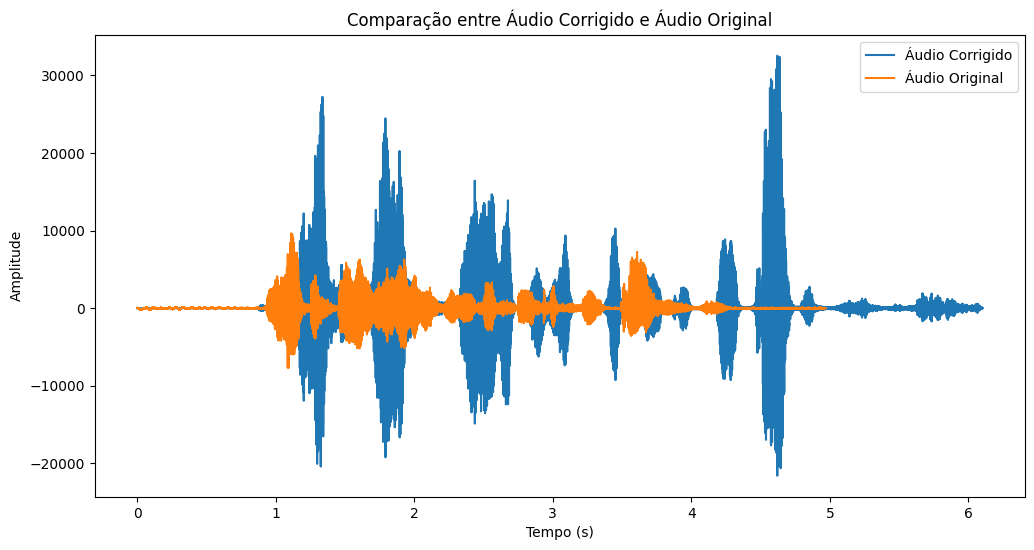

In [7]:
# Corrigir o tom do áudio
semitones_to_change = -2  # Ajuste o valor de semitones conforme necessário
changed_sound = change_pitch("Vozf.wav", semitones_to_change)
changed_audio = np.array(changed_sound.get_array_of_samples())

# Calcular eixo de tempo para os áudios
tempo_voz = np.arange(len(voz_mono)) / sample_rate_voz
tempo_changed = np.arange(len(changed_audio)) / changed_sound.frame_rate

# Reproduzir o áudio corrigido
display(Audio(changed_sound.raw_data, rate=changed_sound.frame_rate, autoplay=True))

# Plot dos áudios corrigido e original (invertido)
plt.figure(figsize=(12, 6))
plt.plot(tempo_changed, changed_audio, label="Áudio Corrigido")
plt.plot(tempo_voz, voz_mono, label="Áudio Original")
plt.title("Comparação entre Áudio Corrigido e Áudio Original")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
